<img src="images/Logo_UCLL_ENG_RGB.png" style="background-color:white;" />

# Data & Artificial Intelligence

Lecturers: Aimée Lynn Backiel, Chidi Nweke

Academic year 2022-2023

## Chapter 1: introduction to the data science cycle

### Recap of the last practical session

We introduced the CRISP-DM framework and we were working on our first end-to-end case.


<center><img src="images/CRISP-DM.png" style="background-color:white; max-width:35%"/></center>

We went through 3 out of the 5 CRISP-DM steps:

1. In business understanding we formalized our goal: predicting who lives and who doesn't in the Titanic.
2. In data understanding we investigated null values, columns that don't provide helpful information (name, ticket, ...). We also used Pandas' ```.groupby()``` and visualizations to see if there were solutions without machine learning. There were two homework questions: did anyone find interesting observations from the data?
3. We did not do anything in the data preparation step. Focus of your first assignment. *hint: notice the double arrows to modelling*.
4. Briefly started with modelling

We emphasised that there's roughly 3 groups working in data:

* (Data) Analysts: They ask the right questions, can fluently visualise data and use it to answer business questions.
* (Data) Scientists: They are more involved with the math and AI algorithms. 
* (Data / MLops) Engineers: They work in data preparation, deployment, monitoring, .... 

In some companies one person does all three and in others they are separate roles. There is room in this domain for people that mostly care about business problems and/or programming. The course will touch on aspects relevant to each of these subdomains.

### Our first case study: The Titanic



Late in the evening of the 14th of April 1912 a ship on its way from Southampton to London called the Titanic collided with an Iceberg and tragically crashed.  You, being interested in data & AI, realise you can use this information to figure out who is likely to survive.

You have access to the following variables:

<blockquote> 

survival - Survival (0 = No; 1 = Yes)

class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

sibsp - Number of Siblings/Spouses Aboard

parch - Number of Parents/Children Aboard

ticket - Ticket Number

fare - Passenger Fare

cabin - Cabin

embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

</blockquote> 


In [1]:
import pandas as pd # Common convention

titanic_df = pd.read_csv('data/train.csv')
titanic_df.head() # Top 5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

### 💻📊 Python primer #2

Each lecture we will cover a few tips and tricks in Python's relevant libraries for data & AI.

This week: basic data structures + numpy and pandas.

List = ```list[]``` or ```[]```

Tuple = ```tuple()``` or ```()```

Dictionary (also called map in other languages) = ```{}```

💡 Notice how in a notebook you do not need to specify ```print()```, the last line is automatically printed out.

In [3]:
list[5, "a", 2]
[5, "a", 2] # more common

[5, 'a', 2]

In [4]:
tuple((5, "a", 2))
(5, "a", 2) # more common

(5, 'a', 2)

In [5]:
{5 : "a"}

{5: 'a'}

In [6]:
testDict = {5: ["a", 2]}
testDict

{5: ['a', 2]}

In [7]:
testDict[5]

['a', 2]

<blockquote> 

#### ❓ Is this behaviour similar to your favourite/most used programming language? 

Can you put more than 1 type in lists by default?

Do you need to specify the types ahead of time?

</blockquote> 

The ```Pandas``` package is one of the main tools we will be using in this course. It borrows a lot from another very important package for data science called ```NumPy```. 

In [8]:
import numpy as np

In [9]:
numpyNumbers = np.arange(10)
listNumbers = list(range(0, 10))
numpyNumbers

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
listNumbers

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

<blockquote> 

#### ❓ What do you think is the result of these operations

```listNumbers * 3```

```listNumbers + listNumbers```


</blockquote> 

In [11]:
listNumbers * 3

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9]

In [12]:
listNumbers + listNumbers

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

<blockquote> 

#### ❓ What do you think is the result of these operations?

```numpyNumbers * 3```

```numpyNumbers + numpyNumbers```


</blockquote> 

In [13]:
numpyNumbers * 3

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27])

In [14]:
numpyNumbers

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
numpyNumbers + numpyNumbers

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [16]:
numpyNumbers = numpyNumbers * 3 # or numpyNumbers *= 3
numpyNumbers 

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27])

💡 This behaviour is called broadcasting. The image below is a visual explanation of broadcasting.

The official documentation describes it as: *The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes.*

You don't need to understand how broadcasting is done, but rather that it happens. To multiply an array with a number you do not need a for each loop or ```.map()``` as you could in C#, Java or a regular Python ```List```.

<img src= "images/broadcasting_1.png">

*Advanced:* Numpy is mostly implemented in the C programming language and is thus considerably faster than regular Python. This does not make a difference when working with a small dataset like in this case, however at scale it does. Numpy contains many functions for common data analysis tasks that are also implemented in C.  It is advisable to check the documentation, stackoverflow, ... to find a function that does what you need to do than write loops as they slow down your code considerably. 

💡 Pandas or NumPy?

Rule of thumb: 

NumPy is great if the data is completely numeric and you will mostly be doing mathmatical operations.

Pandas is more flexible and can deal with heterogenous data (fare is a number while ticket is text). It has functionality that NumPY does not with things such as SQL style joins, groupby, ...

It's easy to convert from one to the other. We will mostly be using Pandas in this course. We covered the basics of NumPy as documentation for some packages (e.g. Pandas) assumes you already know some NumPy and also because Pandas also uses broadcasting.

In [17]:
numbersDict = {"numbers" : np.arange(10)} # The easiest way to create a dataframe is to create a dictionary first
numbersDict

{'numbers': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])}

In [18]:
numbersDF = pd.DataFrame(numbersDict) # You can do this in one line: pd.DataFrame({"numbers" : np.arange(10)})
numbersDF

,numbers
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [19]:
numbersDF["numbers"] * 3

0     0
1     3
2     6
3     9
4    12
5    15
6    18
7    21
8    24
9    27
Name: numbers, dtype: int32

In [20]:
numpyNumbers * numpyNumbers

array([  0,   9,  36,  81, 144, 225, 324, 441, 576, 729])

## 📚 Homework task 1:  We discussed multiplying an array (vector) with a number (scalar) using numpy. There are other important types of multiplication in data science called the dot product, the multiplication of two vectors and two matrices. 

```Python
def dot_product(vector_A: np.array, vector_B: np.array):
    result = 0
    for i in range(vector_A.shape[0]):
        result += vector_A[i] * vector_B[i]
    return result
```

Multiplying two matrices (n-dimensional arrays) is similar to multiplying two vectors. 

```Python
def matrix_multiplication(matrix_A: np.ndarray, matrix_B: np.ndarray):
    result = np.empty(matrix_A.shape[0], matrix_B.shape[1])
    for i in range(matrix_A.shape[0]):
        for j in range(matrix_B.shape[1]):
            result[i, j] = dot_product(matrix_A[i, :], matrix_B[:, j])
    return result
```

1. Make two vectors with random integers (hint: np.random.randint). Can you multiply two vectors with different shapes? What is the dimension of the output. 

2. Try multiplying different matrices with each other. (hint: make vectors as discussed above and turn into matrices by calling ```.reshape()``` on the vector) When do you get errors when multiplying matrices. Can you figure out what shapes you can multiply? What is the output shape?

3. How can you dot product and matrix multiplication with numpy functions. Can you motivate why we should use a numpy function. Consult the documentation/stackoverflow/... 

4. Optional: Would it be hard (don't implement it) to make ```matrix_multiplication``` run in parallel. Do you think this would speed up the computations a lot? Does this make sense for small or large matrices?


In [21]:
def dot_product(vector_A: np.array, vector_B: np.array): #You can add type hints to the definition of functions. They don't do anything except tell the user what type your function is expecting.
    result = 0
    for a, b in zip(vector_A, vector_B): # Notice how this loop is different from the one in the code above. Using zip is more "Pythonic" than iterating by creating a variable called i like in C/C++.
        result += a * b
    return result

def matrix_multiplication(matrix_A: np.ndarray, matrix_B: np.ndarray):
    result = np.empty(shape=(matrix_A.shape[0], matrix_B.shape[1]))
    for i in range(matrix_A.shape[0]):
        for j in range(matrix_B.shape[1]):
            result[i, j] = dot_product(matrix_A[i, :], matrix_B[:, j])
    return result

### Modelling

1. Selecting modeling techniques: What algorithms will we test?
2. Designing tests: How do we test how well our model works?
3. Building the models: We train the selected models
4. Assessing the models: Models can be assessed from a technical point of view (how well do they perform, how fast are they, how scalable are they) but also from a business standpoint (does the output make sense).

❗ There are a lot of different machine learning algorithms out there. The goal of this course is not to discuss them one by one as was done in Business Analytics minor but rather to view this step as one step in an entire process. Not everyone has taken BA minor as we have both have students following from Limburg and abroad.

In later lectures we provide you with tricks on how to select the right algorithm(s) for the right task without knowing the finer details of each of them. 

Students following the 4 ECTS version of this course have 2 tests, one on Python for data science and a second one on AI algorithms. Students from the 6 ECTS version of the course can use this to brush up on their knowledge but are not required to.

<blockquote> 

#### ❓Before we start: How would you evaluate how well our algorithm is doing?


</blockquote> 

<img src= "images/train-test-split_simple-visual-example_v2.webp">

As can be seen in the image above we split the data into two sets, we build an algorithm on one and then evaluate the algorithm on the second. 


<blockquote> 

##### ❓ why can't we just evaluate the algorithm on the first one?

</blockquote> 

❗ The goal of most tasks is to predict well on **unseen** data. It's like studying  for an exam: if you study well (learning) you should be able to solve the questions you used during practice reasonably well, but also new questions. If you can only get it right for questions, or in our case data points, you have already seen that is not learning - that is memorization.

We would want you to do this correctly in your assignments.

#### 💻🤖 ```Sci-kit learn``` is the main machine learning package we will be using. It contains most popular algorithms together with other things from the wider data science toolbox such as model evaluation and data preparation. A key feature of sci-kit learn are Pipelines. 

##### 💻🤖 The ```Pipeline``` class allows you to chain multiple steps after each other. This enables you to carry out transformations of your data (data preparation step in CRISP-DM) and modeling at the same time. Another advantage is that this enables you to deploy, monitor and version control your machine learning models in a correct way. Time permitting, We will discuss this in more detail at the end of the course. 

💡 Machine learning models can only take numeric input. We need to transform the textual variables to so-called onehot encoded variables. The image below is an intuitive explanation

<center> <img src="images/1_ggtP4a5YaRx6l09KQaYOnw.png"></center>



💡 A second transformation we need to do is ensure the data is on the same scale. Otherwise one variable will have more weight to the machine learning model. 

<center> <img src="images/standard scaling.png"></center>


💡 Finally, we impute (fill in the blanks) of the missing values with their mean. 
<center> <img src="images/mean imputation.png"></center>


**These techniques will be discussed at length in the classes that correspond to the respective steps in the CRISP-DM process. Don't worry if they seem arbitrary right now.**

<blockquote> 

##### ❓ What techniques would you apply to what variables? 

</blockquote> 

In [22]:
from sklearn.pipeline import make_pipeline
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from src.ColumnDropper import ColumnDropper  
from sklearn.model_selection import train_test_split

#### Without Pipeline and ColumnTransformer

In [23]:
X = titanic_df.drop("Survived", axis=1)
y = titanic_df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [24]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
298,299,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S
884,885,3,"Sutehall, Mr. Henry Jr",male,25.00,0,0,SOTON/OQ 392076,7.0500,NaN,S
247,248,2,"Hamalainen, Mrs. William (Anna)",female,24.00,0,2,250649,14.5000,NaN,S
478,479,3,"Karlsson, Mr. Nils August",male,22.00,0,0,350060,7.5208,NaN,S
305,306,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S


In [25]:
y_train

298    1
884    0
247    1
478    0
305    1
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 668, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
298,299,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S
884,885,3,"Sutehall, Mr. Henry Jr",male,25.00,0,0,SOTON/OQ 392076,7.0500,NaN,S
247,248,2,"Hamalainen, Mrs. William (Anna)",female,24.00,0,2,250649,14.5000,NaN,S
478,479,3,"Karlsson, Mr. Nils August",male,22.00,0,0,350060,7.5208,NaN,S
305,306,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...
106,107,3,"Salkjelsvik, Miss. Anna Kristine",female,21.00,0,0,343120,7.6500,NaN,S
270,271,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S
860,861,3,"Hansen, Mr. Claus Peter",male,41.00,2,0,350026,14.1083,NaN,S
435,436,1,"Carter, Miss. Lucile Polk",female,14.00,1,2,113760,120.0000,B96 B98,S


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train = X_train.drop(["PassengerId", "Cabin", "Ticket", "Name"], axis=1) 
# axis = 0 rows, axis = 1 column

imputer = SimpleImputer()
oneHot = OneHotEncoder(handle_unknown="ignore", drop="first", sparse=False)
scaler = StandardScaler()

imputedCols = imputer\
    .fit_transform(X_train[["Fare","Age", "SibSp", "Parch"]])

onehotCols =  oneHot\
    .fit_transform(X_train[["Sex", "Embarked", "Pclass", "SibSp", "Parch"]])


X_train = np.hstack([imputedCols, onehotCols])
X_train = scaler.fit_transform(X_train)
X_train

array([[-3.25683040e-02, -2.45961829e-15, -4.67659564e-01, ...,
        -6.71660494e-02, -6.71660494e-02, -3.87201546e-02],
       [-4.87330854e-01, -3.40109868e-01, -4.67659564e-01, ...,
        -6.71660494e-02, -6.71660494e-02, -3.87201546e-02],
       [-3.42854052e-01, -4.17034424e-01, -4.67659564e-01, ...,
        -6.71660494e-02, -6.71660494e-02, -3.87201546e-02],
       ...,
       [-3.50450235e-01,  8.90683024e-01,  1.22097065e+00, ...,
        -6.71660494e-02, -6.71660494e-02, -3.87201546e-02],
       [ 1.70309260e+00, -1.18627998e+00,  3.76655541e-01, ...,
        -6.71660494e-02, -6.71660494e-02, -3.87201546e-02],
       [ 8.74775099e-01, -6.47808091e-01, -4.67659564e-01, ...,
        -6.71660494e-02, -6.71660494e-02, -3.87201546e-02]])

#### With Pipeline and ColumnTransformer

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

imputer = ColumnTransformer(
    [
    ("imputer", SimpleImputer(), ["Age", "Fare"]),
    ("OneHotEncoder", OneHotEncoder(handle_unknown="ignore", drop="first", sparse=False), ["Sex", "Embarked", "Pclass", "SibSp", "Parch"])
    ]
    , remainder='drop'
    )


preprocessing = make_pipeline(imputer, StandardScaler())

Several things are happening here:

1. A ```ColumnTransformer``` takes as input a  ```List[tuple]```. Each tuple consists of a name in the first position, the transformer in the second and the columns that it is applied on in the 3rd positon.
2. The ```SimpleImputer``` replaces missing values by the mean in that column. 
3. The ```OneHotEncoder(handle_unknown="ignore", drop="first")``` applies the transformation as discussed above. The ```handle_unknown="ignore"``` option specifies what to do when encoutering a missing value. The variables will be all 0. ```drop="first"``` ensures that there's 1 less variable than columns. For example, if you know someone did not embark in Cherbourg (0) or Queenstown (0) then they definitely embarked in Southampton (1).
4. ```remainder='passthrough'``` means that the variables that are not selected by the column transformers do not get dropped which is the default behaviour.

Finally all these steps are added into 1 with ```make_pipeline``` this makes the dropper, inputer and then ```StandardScaler``` be applied in sequence. There is also a ```make_columntransformer``` that you can use with (arguably) easier syntax.

In [29]:
preprocessing.fit_transform(X_train)

array([[-2.45961829e-15, -3.25683040e-02,  7.22246558e-01, ...,
        -6.71660494e-02, -6.71660494e-02, -3.87201546e-02],
       [-3.40109868e-01, -4.87330854e-01,  7.22246558e-01, ...,
        -6.71660494e-02, -6.71660494e-02, -3.87201546e-02],
       [-4.17034424e-01, -3.42854052e-01, -1.38456873e+00, ...,
        -6.71660494e-02, -6.71660494e-02, -3.87201546e-02],
       ...,
       [ 8.90683024e-01, -3.50450235e-01,  7.22246558e-01, ...,
        -6.71660494e-02, -6.71660494e-02, -3.87201546e-02],
       [-1.18627998e+00,  1.70309260e+00, -1.38456873e+00, ...,
        -6.71660494e-02, -6.71660494e-02, -3.87201546e-02],
       [-6.47808091e-01,  8.74775099e-01,  7.22246558e-01, ...,
        -6.71660494e-02, -6.71660494e-02, -3.87201546e-02]])

Now that the data is in a format we can give to a machine learning model we can apply a few techniques. 

<blockquote> 

##### ❓ Do you have any examples of algorithms? What would you want to try yourself? Why?

</blockquote> 


In [30]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

In [31]:
logisticReg = make_pipeline(preprocessing, LogisticRegressionCV()) # Attach a ML model to the Pipeline
logisticReg.fit(X_train, y_train)
accuracy_score(logisticReg.predict(X_test), y_test)

0.7937219730941704


<blockquote> 

#####  Two questions

1. ❓ Is this a good score?
2. ❓ Can we trust the algorithm? How do we know how it decides?

</blockquote> 


In order to compare performance we need to compare to so-called baselines. A common baseline is predicting the most frequent class (in this case 0, not surviving). ```Sci-kit learn``` supports this functionality with ```DummyClassifier``` and ```DummyRegressor```. 

On top of this you can also consider seperations based on age, class, city of embarkement, ...

In [32]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)

accuracy_score(dummy.predict(X_test), y_test)

0.600896860986547

💡 Trusting our algorithm: explainable AI

Our model, logistic regression, has coefficients also called weights. If the sum of the weights times the data is under 0.5 plus another term called the bias (b) it will classify the datapoint as a non-survivor, while if the sum of the sum of the coefficients times the data is over 0.5 it wil classify the datapoint as a survivor. You can look at the coefficients to get an idea of how the algorithm is making its decisions.


```python 
if 1 / (1 + np.e**-(np.dot(coef_ * data ) + b)) >= 0.5: 1
else: 0
```

Reminder: $e$ is a number and ```np.e**2``` is Python for $e^{2}$ the function above is simply there to ensure all numbers are between 0 and 1.

In [33]:
logisticReg

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('imputer',
                                                                   SimpleImputer(),
                                                                   ['Age',
                                                                    'Fare']),
                                                                  ('OneHotEncoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False),
                                                                   ['Sex',
                                                                    'Embarked',
                                                                 

💡 The algorithm itself is a ```Pipeline``` object that contains several steps. First we need to navigate to the correct step to get the variable names and afterwards to get the coefficients. While navigating it is clear that ```make_pipeline``` and/or ```make_columntransformer```  do result in clear names, using the longer ```Pipeline``` and ```ColumnTransformer``` result in more descriptive names that make navigation easier (see below).

In [34]:
variable_names = logisticReg.named_steps["pipeline"]\
.named_steps["columntransformer"]\
.named_transformers_["OneHotEncoder"].get_feature_names_out()

variable_names

array(['Sex_male', 'Embarked_Q', 'Embarked_S', 'Embarked_nan', 'Pclass_2',
       'Pclass_3', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5',
       'SibSp_8', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5',
       'Parch_6'], dtype=object)

In [35]:
logisticReg.named_steps["logisticregressioncv"].coef_

array([[-0.22229486,  0.26824798, -1.00142644, -0.02740539, -0.17882128,
         0.07907384, -0.04171831, -0.51592241,  0.0363667 , -0.01386903,
        -0.16894649, -0.0898559 , -0.17132689, -0.22845524,  0.14530334,
        -0.0021739 ,  0.12602008, -0.16654241, -0.15322806, -0.09979366]])

In [36]:
logisticReg.named_steps["logisticregressioncv"].intercept_ # The b in the equation above

array([-0.6171841])

##### ❓ What information can you derive from this? 

##### ❓ Extra hard question: what is the main drawback of this model?

Answer to question 2: The main drawback of this model is that it considers each of the variable separately. It could be the case that certain variables together cause someone to survive. An example is SibSp and Parch, if both of them are 0 the chances of survival could be higher. A machine learning model that is adept at dealing with AND and XOR problems (we will cover this further in the class, time permitting) are decision trees.

It is also possible to visualise the results of a decision tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = make_pipeline(preprocessing, DecisionTreeClassifier())
decisionTree.fit(X_train, y_train)

accuracy_score(decisionTree.predict(X_test), y_test)

0.7488789237668162

In [38]:
decisionTree.named_steps

{'pipeline': Pipeline(steps=[('columntransformer',
                  ColumnTransformer(transformers=[('imputer', SimpleImputer(),
                                                   ['Age', 'Fare']),
                                                  ('OneHotEncoder',
                                                   OneHotEncoder(drop='first',
                                                                 handle_unknown='ignore',
                                                                 sparse=False),
                                                   ['Sex', 'Embarked', 'Pclass',
                                                    'SibSp', 'Parch'])])),
                 ('standardscaler', StandardScaler())]),
 'decisiontreeclassifier': DecisionTreeClassifier()}

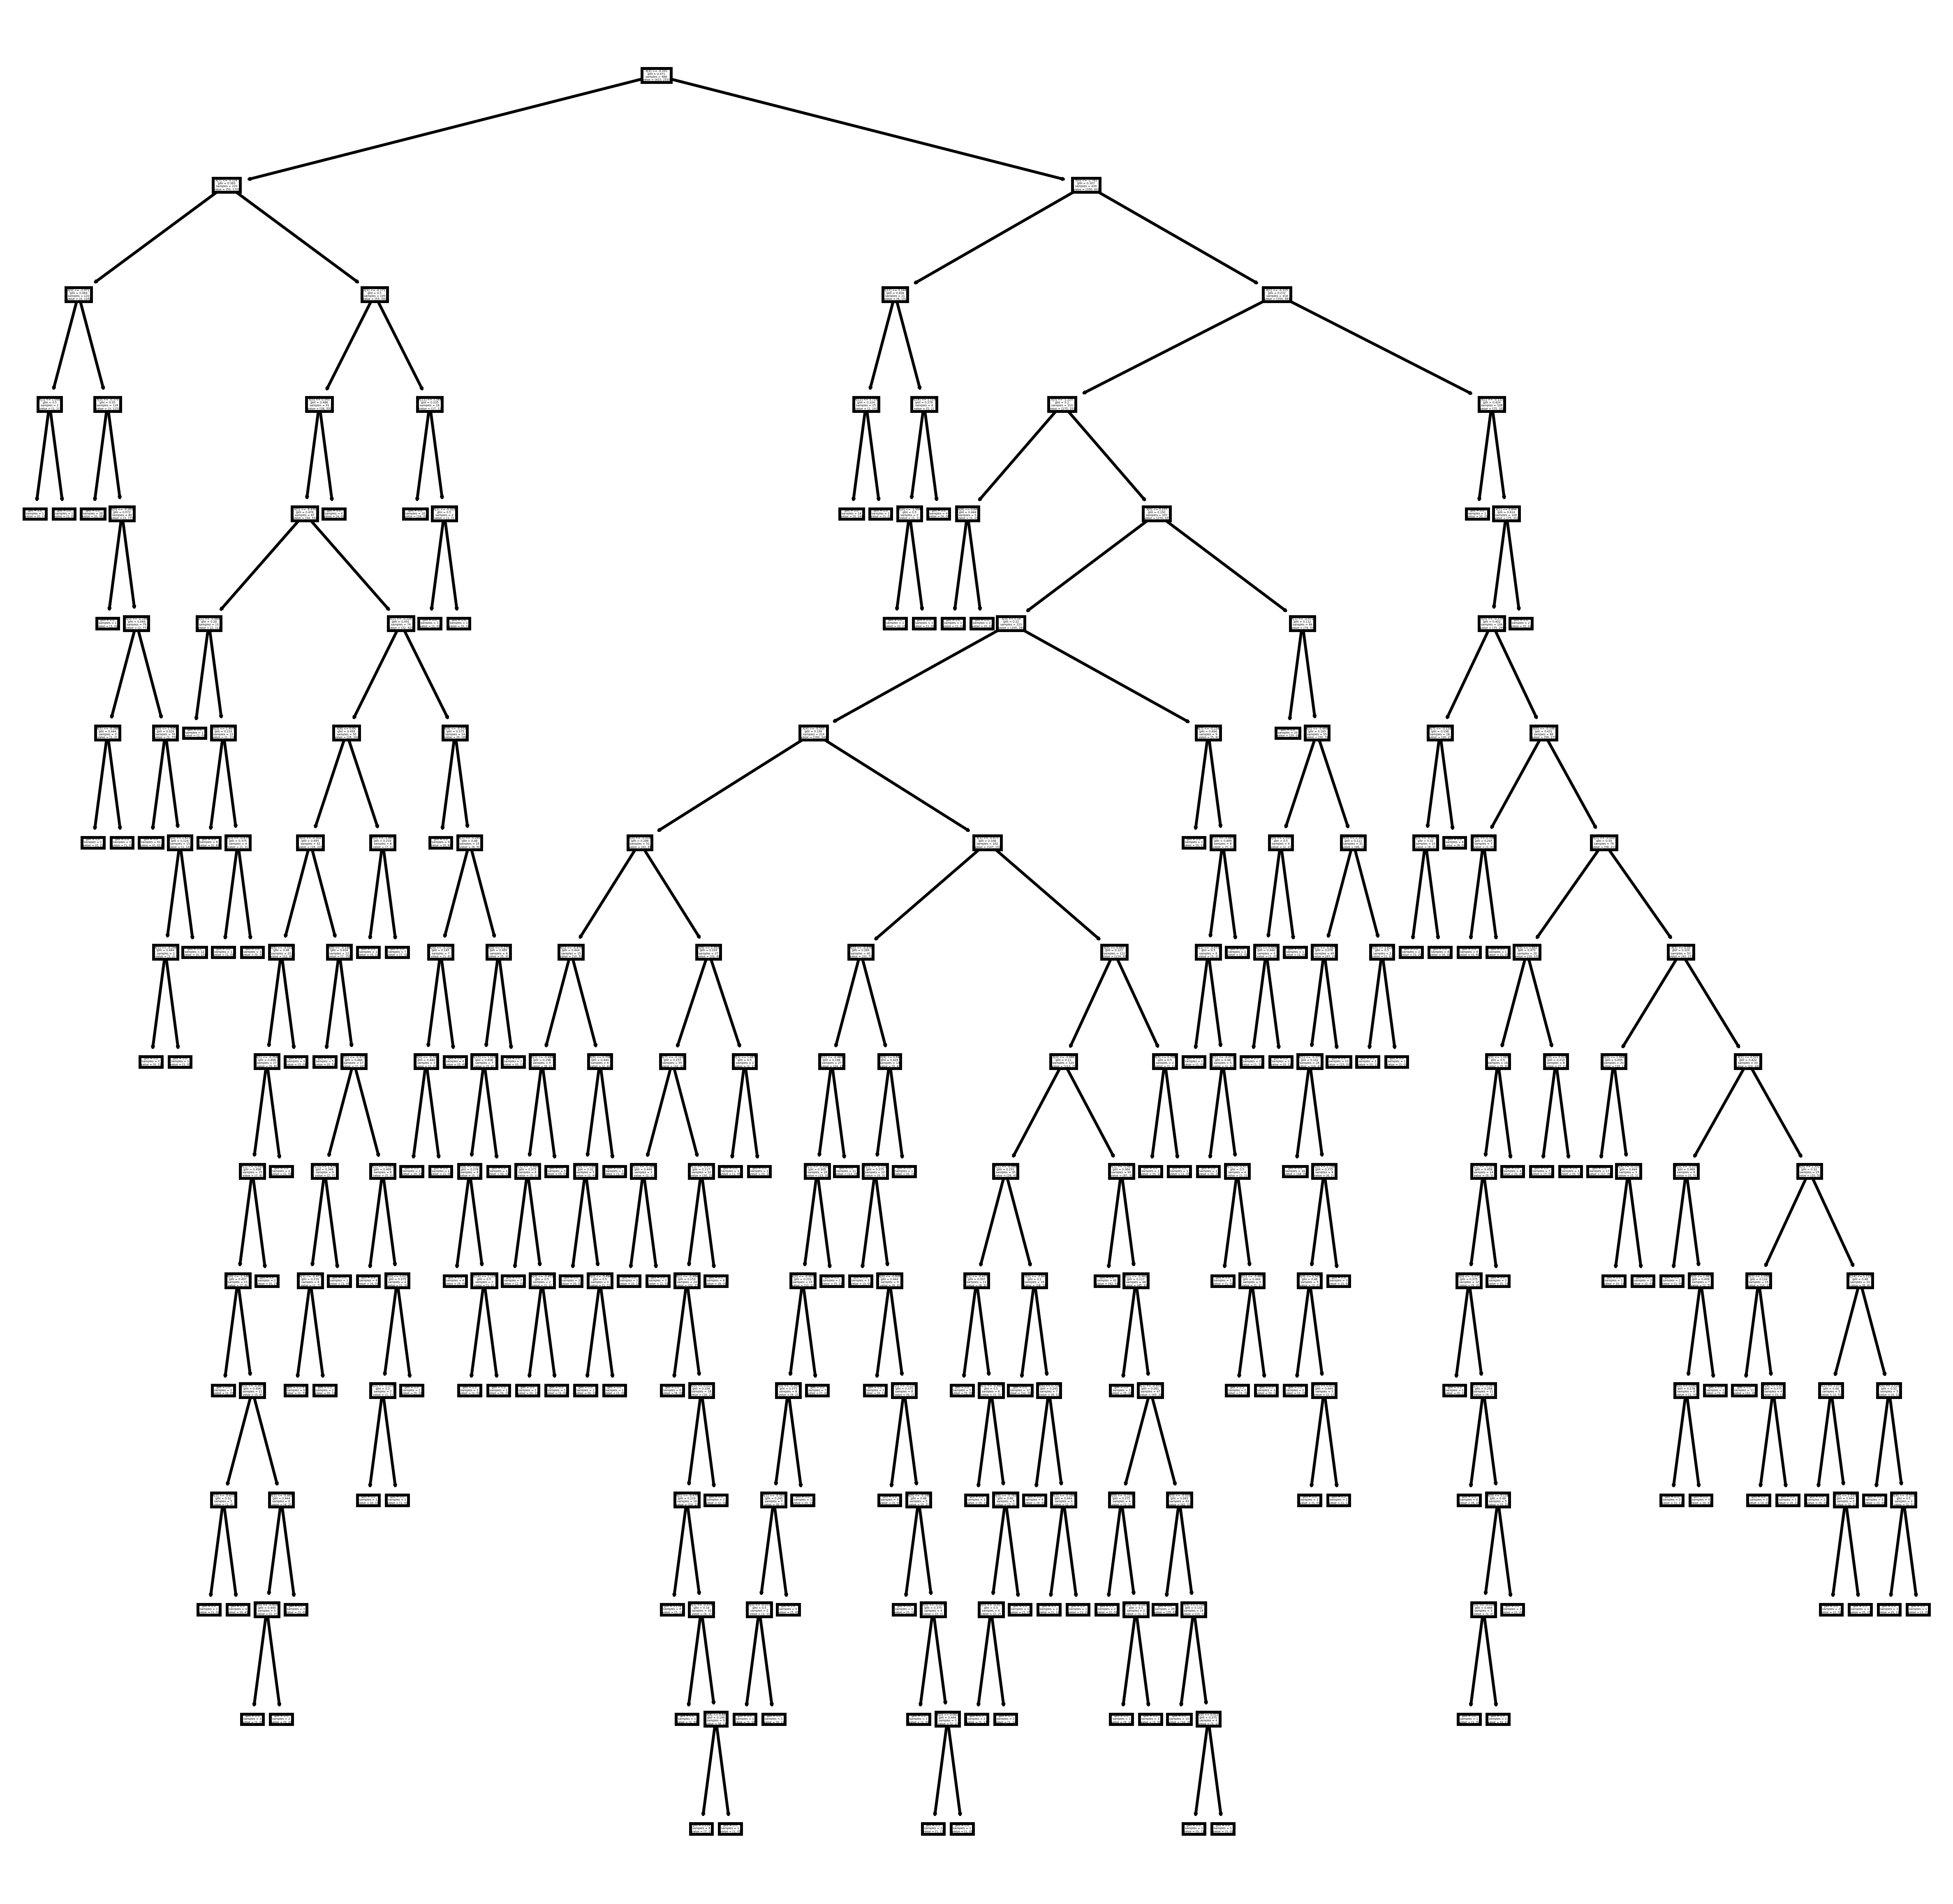

In [39]:
from sklearn.tree import plot_tree, export_text, export_graphviz

plt.figure(figsize=(12,12), dpi=500)
plot_tree(decisionTree.named_steps["decisiontreeclassifier"]);

Beyond regular decision trees there are a slew of other AI algorithms that combine several decision trees into a so-called ensemble. These can be imported from ```sklearn.ensemble```. We will try the popular Random Forest algorithm with two more lesser known decision tree ensembles.

In [40]:
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier

rf = make_pipeline(preprocessing, RandomForestClassifier())
rf.fit(X_train, y_train)

accuracy_score(rf.predict(X_test), y_test)

0.7892376681614349

In [41]:
gbm = make_pipeline(preprocessing, GradientBoostingClassifier())
gbm.fit(X_train, y_train)

accuracy_score(gbm.predict(X_test), y_test)


0.8116591928251121

## 📚 Homework task 2: Try K-nearest neighbours (KNN) on this dataset. First use the default amount of nearest neighbours (n_neighbours = 5). Try manually changing the values. Does your performance get better or worse? Try the list of values below. Print out the results with the amount of neighbours used in a loop with how long it takes. Can you see any difference?


In [42]:
from sklearn.neighbors import KNeighborsClassifier

# Make your KNN model first here

In [43]:
nearestList = [1, 2, 3, 4, 5, 8, 9, 11, 15, 20, 30, 40, 50]

for neighbours in nearestList:

    # Add your nearest neighbours algorithm code here

    # Python's syntax for string formatting. if you add f in front of a string (' or ") you can add variables or calculations in square brackets {} that will get formatted when the string is printed.
    # replace {0} with {accuracy_score}

    print(f"KNN evaluated with with {neighbours} neighbours. The performance was: {0}") 

KNN evaluated with with 1 neighbours. The performance was: 0
KNN evaluated with with 2 neighbours. The performance was: 0
KNN evaluated with with 3 neighbours. The performance was: 0
KNN evaluated with with 4 neighbours. The performance was: 0
KNN evaluated with with 5 neighbours. The performance was: 0
KNN evaluated with with 8 neighbours. The performance was: 0
KNN evaluated with with 9 neighbours. The performance was: 0
KNN evaluated with with 11 neighbours. The performance was: 0
KNN evaluated with with 15 neighbours. The performance was: 0
KNN evaluated with with 20 neighbours. The performance was: 0
KNN evaluated with with 30 neighbours. The performance was: 0
KNN evaluated with with 40 neighbours. The performance was: 0
KNN evaluated with with 50 neighbours. The performance was: 0


### ❓ We intentionally made a subtle yet important mistake surrounding splitting the data. Do you know?

❗ We split after visualizing and getting information out of the data. As previously mentioned, we're interested in mimicking the performance against unseen data. The data we tested on was not truly unseen as we explored it and made decisions based on it (what variables to drop, what variables to impute etc.) in reality you have (nearly) zero information about that data. This is an important thing to remember.

### ❓ Extra 1: Are we done or can we do better?

1. Creating a new variable that is the sum of children + siblings called family size. 💡 This means going back to the data preparation step, hence why there are arrows back and forth in the CRISP-DM framework.
2. Changing the default parameters of our machine learning model (future lectures)

In [44]:
from src.ColumnAdder import ColumnAdder

adder = ColumnAdder(["SibSp", "Parch"], "familySize")

imputer = ColumnTransformer(
    [
    ("imputer", SimpleImputer(), ["Age", "Fare"]),
    ("OneHotEncoder", OneHotEncoder(handle_unknown="ignore", drop="first", sparse=False), ["Sex", "familySize", "Embarked", "Pclass", "SibSp", "Parch"])
    ]
    , remainder='drop'
    )


preprocessing2 = make_pipeline(adder, imputer, StandardScaler())

In [45]:
preprocessing2.fit_transform(X_train)

array([[-2.45961829e-15, -3.25683040e-02,  7.22246558e-01, ...,
        -6.71660494e-02, -6.71660494e-02, -3.87201546e-02],
       [-3.40109868e-01, -4.87330854e-01,  7.22246558e-01, ...,
        -6.71660494e-02, -6.71660494e-02, -3.87201546e-02],
       [-4.17034424e-01, -3.42854052e-01, -1.38456873e+00, ...,
        -6.71660494e-02, -6.71660494e-02, -3.87201546e-02],
       ...,
       [ 8.90683024e-01, -3.50450235e-01,  7.22246558e-01, ...,
        -6.71660494e-02, -6.71660494e-02, -3.87201546e-02],
       [-1.18627998e+00,  1.70309260e+00, -1.38456873e+00, ...,
        -6.71660494e-02, -6.71660494e-02, -3.87201546e-02],
       [-6.47808091e-01,  8.74775099e-01,  7.22246558e-01, ...,
        -6.71660494e-02, -6.71660494e-02, -3.87201546e-02]])

In [46]:
logisticReg = make_pipeline(preprocessing2, LogisticRegressionCV()) 
logisticReg.fit(X_train, y_train)
accuracy_score(logisticReg.predict(X_test), y_test)

0.7937219730941704

The performance is exactly the same as previously. Modelling is a lot about experimentation. Some things you try may have the same or even worse results.

## 📚 Homework task 3: Data analysis on the prediction errors

The last homework is about investigating what type of data the algorithm was struggling to make good predictions on. We encourage you to use  the best result of your own nearest neighbour algorithm you constructed above. What we suggest you do is to do a similar analysis as we did in the beginning of the first session but instead focus on the instances (data points) the algorithm got wrong.

In [47]:
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)

X_test = X_test.assign(predictions = y_pred) # you can add a column with assign
X_test = X_test.assign(Survived = y_test)

X_test["Correct Prediction"] = X_test["predictions"] == X_test["Survived"] #  Another way to add a column to an existing dataframe. 

In [48]:
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familySize,predictions,Survived,Correct Prediction
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,2,0,1,False
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,0,0,0,True
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,0,0,0,True
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S,0,1,1,True
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,2,1,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,0,1,1,True
425,426,3,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,7.2500,NaN,S,0,0,0,True
101,102,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S,0,0,0,True
199,200,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,NaN,S,0,1,0,False


In [49]:
X_test.groupby() # Start exploring

TypeError: You have to supply one of 'by' and 'level'

### ❓ Extra 2: ... But what's the difference between all those algorithms?

These algorithms look for "lines" which they can use to separate survivors from non-survivors. 

💡 The main difference between algorithms is the type of "line" they are capable of drawing.


The first algorithm we used, logistic regression, can only draw straight lines. These are frequently called linear models. The advantage of these is that you can nearly always explain their results easily: the coefficients are roughly how important each variable is.
<center> <img src="images/linearclassifier.png"> </center>

Other algorithms such as decision trees are capable of drawing more complex lines. These are called non-linear classifiers. The image below is the output of different algorithms on 3 problems. Before you start the 3rd assignment we will provide you with general tips on how to select the best classifier for the job. Notice in the image below that there are points

<center> <img src="images/classifier comparison.png"> </center>